In [34]:
def factorial(a):
    for i in range (1, a):
        a = a * i
    return a
print(factorial(5))

120


In [40]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
# import missingno as ms
import numpy as np

In [42]:
data = pd.read_csv('hour-train.csv')

In [43]:
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13944,13945,2012-08-09,3,1,8,5,0,4,1,2,0.66,0.5909,0.94,0.0000,4,37,41
13945,13946,2012-08-09,3,1,8,6,0,4,1,1,0.66,0.6061,0.83,0.1642,5,162,167
13946,13947,2012-08-09,3,1,8,7,0,4,1,2,0.70,0.6667,0.84,0.1642,24,451,475
13947,13948,2012-08-09,3,1,8,8,0,4,1,1,0.72,0.6970,0.74,0.1045,28,670,698


In [46]:
print(data.shape)

(13949, 17)


In [50]:
drop_features = {"instant", "dteday"}
data = data.drop(columns = drop_features)

KeyError: "['instant' 'dteday'] not found in axis"

In [51]:
data

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13944,3,1,8,5,0,4,1,2,0.66,0.5909,0.94,0.0000,4,37,41
13945,3,1,8,6,0,4,1,1,0.66,0.6061,0.83,0.1642,5,162,167
13946,3,1,8,7,0,4,1,2,0.70,0.6667,0.84,0.1642,24,451,475
13947,3,1,8,8,0,4,1,1,0.72,0.6970,0.74,0.1045,28,670,698


In [54]:
data.dtypes

season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [55]:
for c in data:
    print(c)

season
yr
mnth
hr
holiday
weekday
workingday
weathersit
temp
atemp
hum
windspeed
casual
registered
cnt


In [57]:
categorical_features = {'season', 'yr', 'mnth','holiday', 'hr', 'workingday', 'weathersit', 'weekday'}
for feature in categorical_features:
    data[feature] = data[feature].astype('category')

In [60]:
data['temp'] = data['temp'].astype('float32')

In [61]:
data.dtypes

season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float32
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
type           float32
dtype: object

In [65]:
print(data.isnull().sum())
# ms.matrix(data,figsize = (10, 3), color = (0.1, 0.4, 0.1))

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
type          0
dtype: int64


In [70]:
data['cnt'].describe()

count    13949.000000
mean       175.092695
std        167.510453
min          1.000000
25%         37.000000
50%        131.000000
75%        259.000000
max        957.000000
Name: cnt, dtype: float64

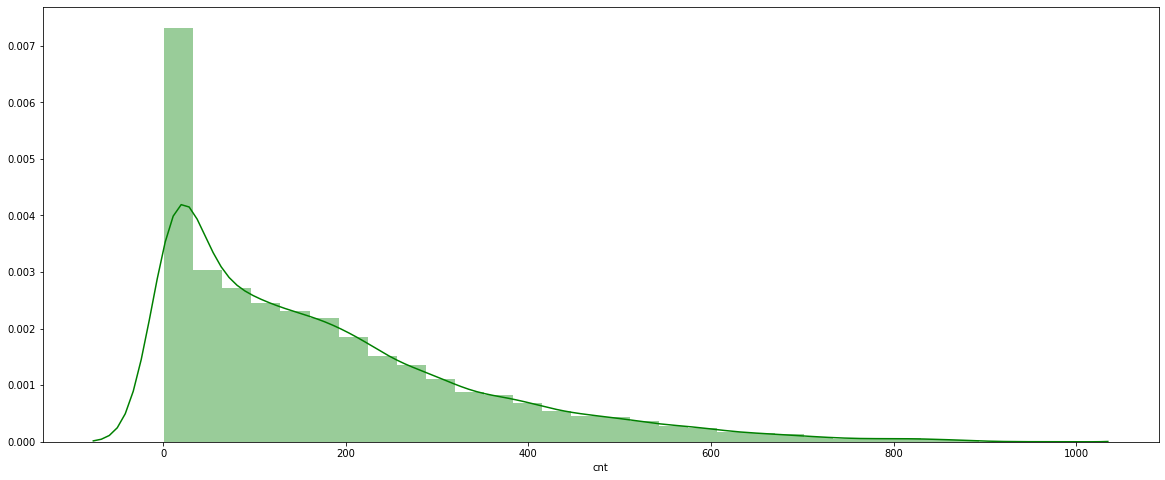

In [73]:
plt.figure(figsize = (20, 8))
sb.distplot(data['cnt'], color = 'g', bins = 30, hist_kws = {'alpha' : 0.4});

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a0453d0>,
      dtype=object)

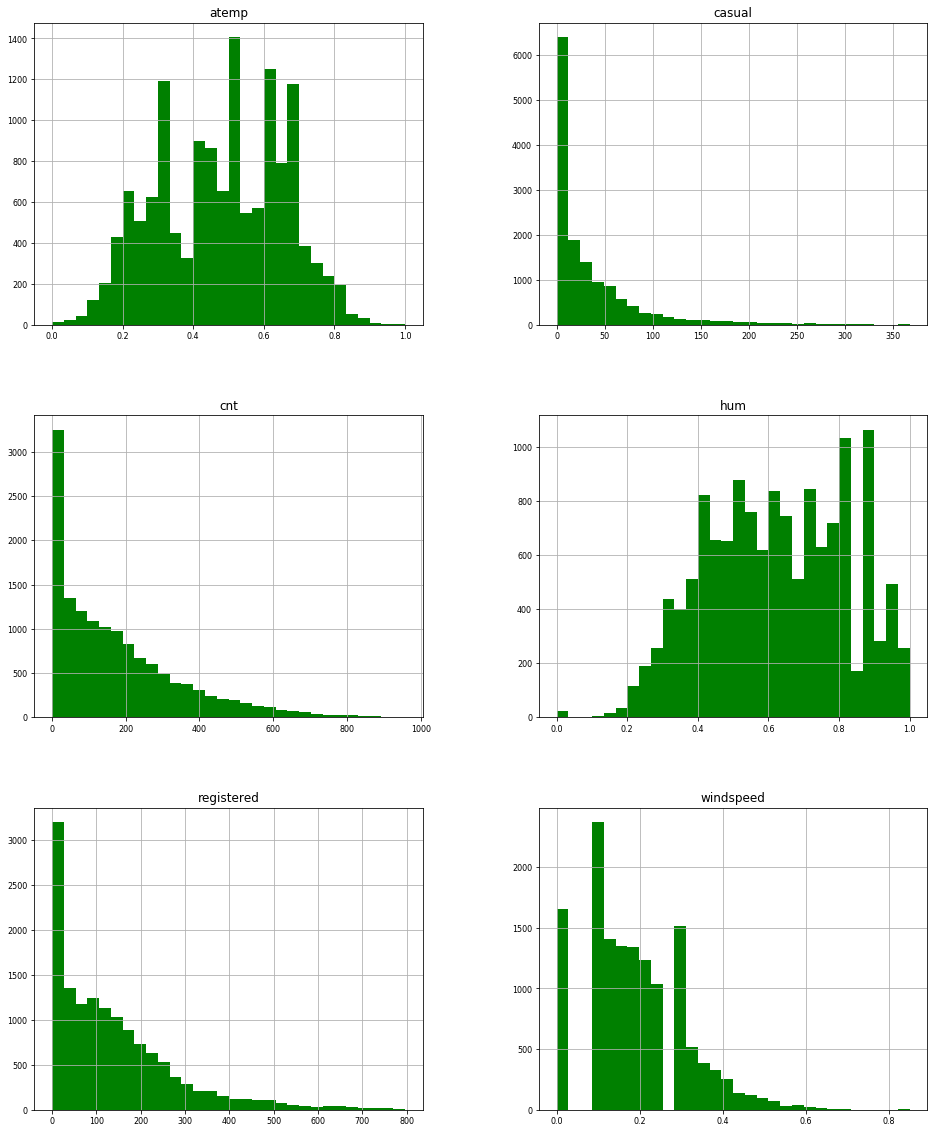

In [76]:
numerical_fetures = data.select_dtypes(include = ['float64', 'int64'])
numerical_fetures.hist(figsize = (16, 20), color = 'g', bins = 30, xlabelsize = 8, ylabelsize = 8)

In [77]:
data.median()

season          2.0000
yr              0.0000
mnth            5.0000
hr             12.0000
holiday         0.0000
weekday         3.0000
workingday      1.0000
weathersit      1.0000
temp            0.5000
atemp           0.4848
hum             0.6200
windspeed       0.1940
casual         15.0000
registered    107.0000
cnt           131.0000
type            0.5000
dtype: float64

In [79]:
data.mode()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,type
0,2,0,5,16,0,6,1,1,0.7,0.6212,0.88,0.0,0.0,4.0,5.0,0.7
1,NaN,NaN,7,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
data['cnt'].describe()

count    13949.000000
mean       175.092695
std        167.510453
min          1.000000
25%         37.000000
50%        131.000000
75%        259.000000
max        957.000000
Name: cnt, dtype: float64

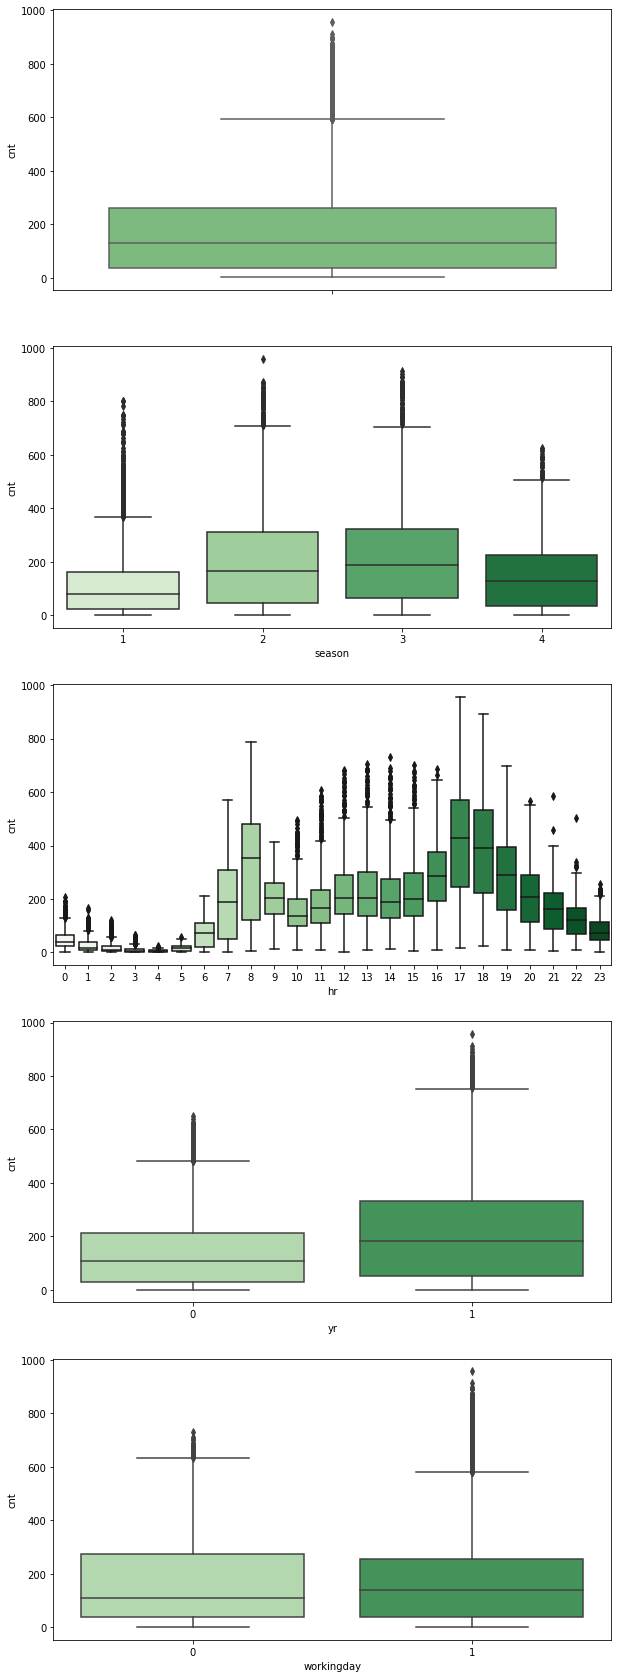

In [84]:
fig, axes = plt.subplots(nrows = 5, ncols = 1)
fig.set_size_inches(10, 30)
sb.boxplot(data = data, y ='cnt', orient = 'v', ax = axes[0], palette = 'Greens')
sb.boxplot(data = data, y ='cnt', x = 'season', orient = 'v', ax = axes[1], palette = 'Greens')
sb.boxplot(data = data, y ='cnt', x = 'hr', orient = 'v', ax = axes[2], palette = 'Greens')
sb.boxplot(data = data, y ='cnt', x = 'yr', orient = 'v', ax = axes[3], palette = 'Greens')
sb.boxplot(data = data, y ='cnt', x = 'workingday', orient = 'v', ax = axes[4], palette = 'Greens')

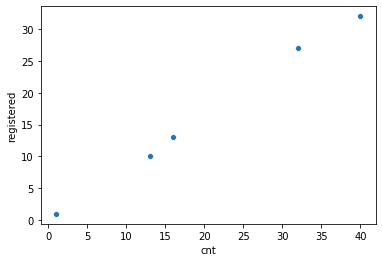

In [96]:
sb.scatterplot(data['cnt'].head(),data['registered'].head() )

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


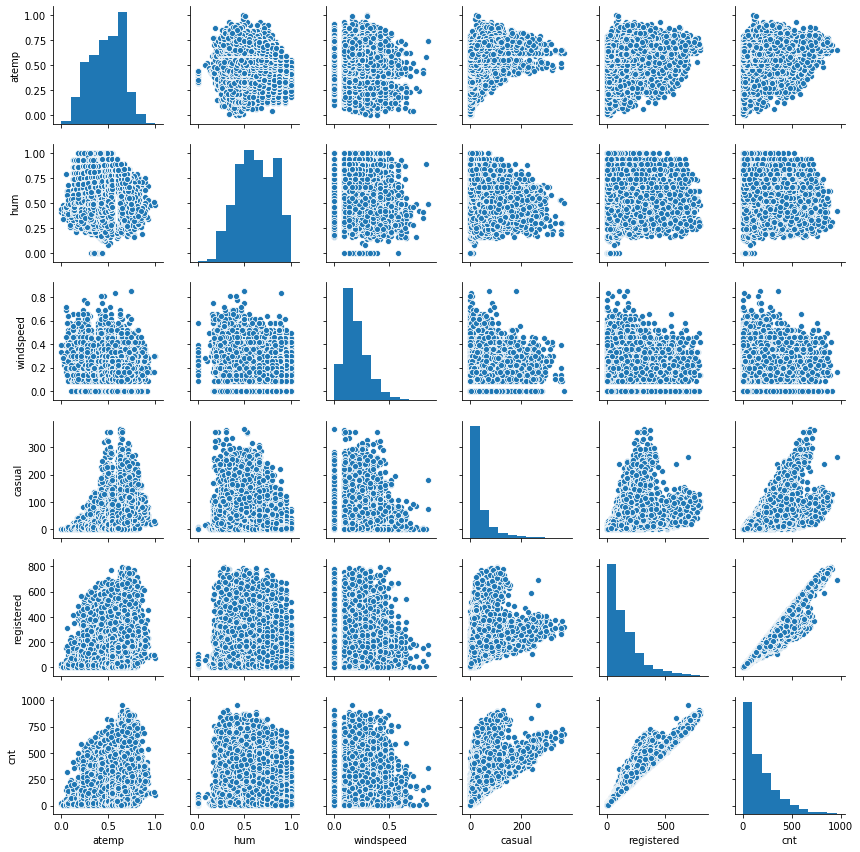

In [99]:
sb.pairplot(numerical_fetures, size = 2)